In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division

%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 
              'waterfront':int,
              'sqft_above':int,
              'sqft_living15':float,
              'grade':int,
              'yr_renovated':int,
              'price':float,
              'bedrooms':float,
              'zipcode':str,
              'long':float,
              'sqft_lot15':float,
              'sqft_living':float,
              'floors':str,
              'condition':int,
              'lat':float,
              'date':str,
              'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
# Read in the data
data_train = pd.read_csv('./data/wk3_kc_house_train_data.csv')

In [4]:
data_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [5]:
# Testing making polynomial columns
features = ['bedrooms', 'bathrooms']
test = data_train[features].apply(lambda x: x**2)
test.head()

,bedrooms,bathrooms
0,16,9.0000
1,16,20.2500
2,4,1.0000
3,9,1.0000
4,9,3.0625


In [6]:
def polynomial_dataframe(data, feature, output, degree):
    """
    Function which accepts a feature array and creates a dataframe
    with first column equal to the feature and the remaining columns
    to increasing integer powers up to degree.
    """
    
    assert degree >= 1 # Degree must be at least one
    
    # Initialize dataframe
    poly_df = pd.DataFrame()
    
    # Add the feature array to dataframe
    poly_df['power_1'] = data[feature]
    
    # Loop over the degrees
    if degree > 1:
        for power in range(2, degree+1):
            # Name of poly. column
            name = 'power_' + str(power)
            # Create the column
            poly_df[name] = poly_df['power_1'].apply(lambda x: x**power)

    # Add the output column if assigned
    if output:
        poly_df[output] = data[output]
    
    return poly_df      

# Testing
bedroom_poly_test = polynomial_dataframe(test, 'bedrooms', None , 4)
bedroom_poly_test.head()

,power_1,power_2,power_3,power_4
0,16,256,4096,65536
1,16,256,4096,65536
2,4,16,64,256
3,9,81,729,6561
4,9,81,729,6561


In [7]:
# Read in sales data
sales = pd.read_csv('./data/kc_house_data.csv')
sales = sales.sort_values(['sqft_living', 'price'])

In [8]:
sales.head() # Sort looks OK

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [9]:
# Create poly df of sqft_living
poly1_data = polynomial_dataframe(sales, feature='sqft_living', output='price', degree=1)
poly1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


In [10]:
# Fire up scikit-learn modulues
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse    

In [11]:
def create_linear_regression_model(data, features, output):
    """
    Fit a linear regression classifier.
    """
    # Initiate the classifier
    linreg_clf = LinearRegression(normalize=True)
    # Fit the data
    
    X = data[features].as_matrix()
    
    # Need to create the 1-D array to a N x 1 matrix
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    
    y = data[output].as_matrix()
    
    linreg_clf.fit(X, y)
    
    return linreg_clf

In [12]:
def predict(model, poly_data):
    # Extract the polynomial features
    features = [f for f in poly_data.columns.values if f.startswith('power')]
    return model.predict(poly_data[features])
        
def plot_poly(poly_data, model):
    """
    Scatter plot of the price vs sqft_living data compared with the
    fitted linear regression model.
    """
    # Scatter plot
    plt.plot(poly_data['power_1'], poly_data['price'], "." ,
             poly_data['power_1'], predict(model, poly_data), "-")
    plt.xlabel("sqft_living")
    plt.ylabel("price")   

### Polynomial 1st degree

In [13]:
model1 = create_linear_regression_model(poly1_data, features='power_1', output='price')

print model1.intercept_
print model1.coef_

-43580.7430945
[ 280.6235679]


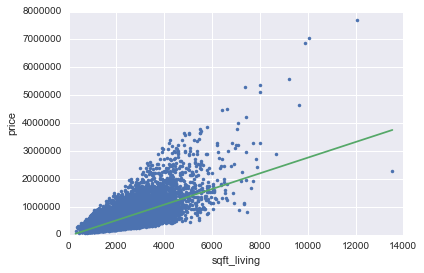

In [14]:
# Plot of poly. degree 1
plot_poly(poly1_data, model1)

### Polynomial 2nd degree

In [15]:
# Polynomial up to two degrees
poly2_data = polynomial_dataframe(sales, feature='sqft_living', output='price', degree=2)
poly2_data.head()

,power_1,power_2,price
19452,290,84100,142000.0
15381,370,136900,276000.0
860,380,144400,245000.0
18379,384,147456,265000.0
4868,390,152100,228000.0


In [16]:
model2 = create_linear_regression_model(poly2_data, features=['power_1', 'power_2'], output='price')
print model2.intercept_
print model2.coef_

199222.279305
[  6.79940947e+01   3.85812609e-02]


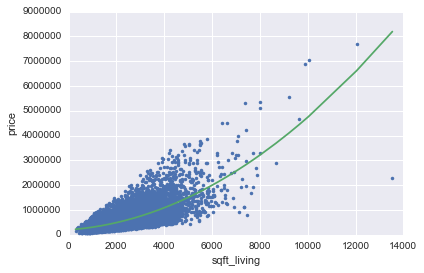

In [17]:
# Plot the polynomials with degree 2
plot_poly(poly2_data, model2)

### Polynomial 3rd degree

In [18]:
# Polynomial up to three degrees
poly3_data = polynomial_dataframe(sales, feature='sqft_living', output='price', degree=3)

# Create linreg model
model3 = create_linear_regression_model(poly3_data, 
                                        features=['power_' + str(i) for i in range(1, 4)],
                                        output='price')
print model3.intercept_
print model3.coef_

336819.748223
[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]


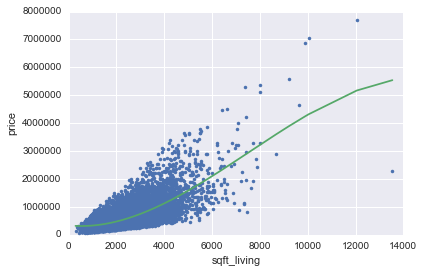

In [19]:
plot_poly(poly3_data, model3)

### Polynomial 15th degree

Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [20]:
# Polynomial up to three degrees
poly15_data = polynomial_dataframe(sales, feature='sqft_living', output='price', degree=15)

# Create linreg model
model15 = create_linear_regression_model(poly15_data, 
                                        features=['power_' + str(i) for i in range(1, 16)],
                                        output='price')
print model15.intercept_
print model15.coef_

226344.861772
[  7.21924312e+01   1.28784550e-02   8.79729440e-06  -6.34216415e-10
  -1.93870259e-14  -1.56852046e-16  -4.59549424e-16   3.42171231e-16
  -1.99017782e-16  -2.50331936e-16   2.19637692e-16   6.74866893e-16
   4.48269462e-16  -4.08361862e-16   6.67469145e-17]


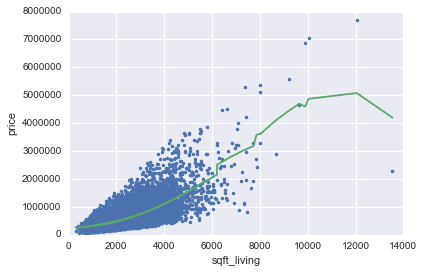

In [21]:
plot_poly(poly15_data, model15)

### Polynomial 15th degree, new sets

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [22]:
# Read in the data
sales_set1 = pd.read_csv("./data/wk3_kc_house_set_1_data.csv", dtype=dtype_dict)
sales_set2 = pd.read_csv("./data/wk3_kc_house_set_2_data.csv", dtype=dtype_dict)
sales_set3 = pd.read_csv("./data/wk3_kc_house_set_3_data.csv", dtype=dtype_dict)
sales_set4 = pd.read_csv("./data/wk3_kc_house_set_4_data.csv", dtype=dtype_dict)

# Sort the data
sales_set1 = sales_set1.sort_values(['sqft_living', 'price'])
sales_set2 = sales_set2.sort_values(['sqft_living', 'price'])
sales_set3 = sales_set3.sort_values(['sqft_living', 'price'])
sales_set4 = sales_set4.sort_values(['sqft_living', 'price'])

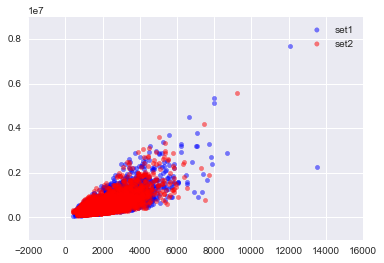

In [23]:
# Just to show the different sets
plt.scatter(sales_set1['sqft_living'], sales_set1['price'], color="b", alpha=0.5, label="set1")
plt.scatter(sales_set2['sqft_living'], sales_set2['price'], color="r", alpha=0.5, label="set2")
plt.legend(loc=0)

In [24]:
def create_poly_and_linreg_model(data, feature, output, degree):
    poly_data = polynomial_dataframe(data, feature, output, degree)
    model = create_linear_regression_model(poly_data, 
                                           features=['power_' + str(i) for i in range(1, degree+1)],
                                           output=output)
    return poly_data, model

### Estimate using the 4 different sets
#### Set 1

In [25]:
poly15_set1, model15_set1 = create_poly_and_linreg_model(data=sales_set1,
                                                         feature='sqft_living',
                                                         output='price',
                                                         degree=15)

#### Set 2

In [26]:
poly15_set2, model15_set2 = create_poly_and_linreg_model(data=sales_set2,
                                                         feature='sqft_living',
                                                         output='price',
                                                         degree=15)

#### Set 3

In [27]:
poly15_set3, model15_set3 = create_poly_and_linreg_model(data=sales_set3,
                                                         feature='sqft_living',
                                                         output='price',
                                                         degree=15)

#### Set 4

In [28]:
poly15_set4, model15_set4 = create_poly_and_linreg_model(data=sales_set4,
                                                         feature='sqft_living',
                                                         output='price',
                                                         degree=15)

### Plotting the coefficients of the different sets

N.B: I have plotted the log(coeff).

In [29]:
coeff_poly15_sets_df = pd.DataFrame({"Set1" : model15_set1.coef_,
                               "Set2" : model15_set2.coef_,
                               "Set3" : model15_set3.coef_,
                               "Set4" : model15_set4.coef_})

coeff_poly15_sets_df

,Set1,Set2,Set3,Set4
0,-8.909938e+04,2.504469e+04,-3.564221e+04,-4.726023e+04
1,2.654867e+02,-8.272689e+01,1.143611e+02,1.839381e+02
2,-4.473242e-01,1.546155e-01,-2.067059e-01,-3.995924e-01
3,4.813455e-04,-1.847311e-04,2.383577e-04,5.499862e-04
4,-3.526917e-07,1.512764e-07,-1.869596e-07,-5.127464e-07
5,1.827650e-10,-8.845363e-11,1.035906e-10,3.371699e-10
6,-6.851861e-14,3.781022e-14,-4.147364e-14,-1.603739e-13
7,1.881309e-17,-1.195427e-17,1.214666e-17,5.598411e-17
8,-3.796797e-21,2.802333e-21,-2.612669e-21,-1.442340e-20
9,5.604227e-25,-4.840955e-25,4.109156e-25,2.733363e-24


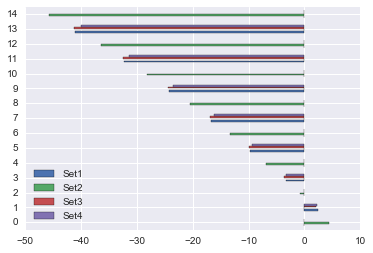

In [30]:
# Plot the log of the coefficients
coeff_poly15_sets_df.apply(np.log10).plot.barh()

### Plotting the estimated set models

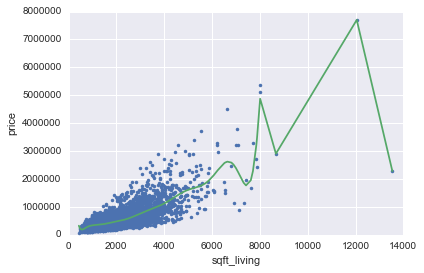

In [31]:
plot_poly(poly15_set1, model15_set1)

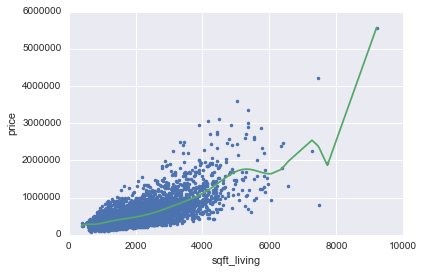

In [32]:
plot_poly(poly15_set2, model15_set2)

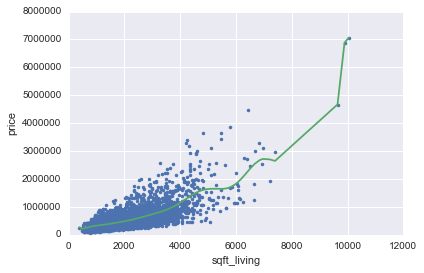

In [33]:
plot_poly(poly15_set3, model15_set3)

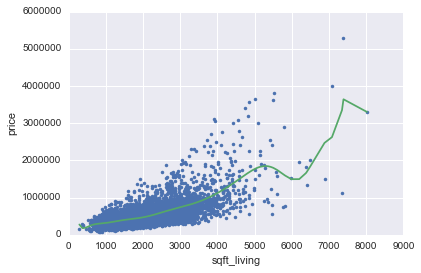

In [34]:
plot_poly(poly15_set4, model15_set4)

We see from the four plots above, that every subset model is different from the other

# 12. Quiz Question:

Is the sign (positive or negative) for power_15 the same in all four models?

In [35]:
coeff_poly15_sets_df.iloc[-1] > 0

Set1    False
Set2     True
Set3    False
Set4    False
Name: 14, dtype: bool

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree.

### Find the best polynomial 

Now for each degree from 1 to 15:
- Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
- Add training_data[‘price’] as a column to your polynomial data set
- Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
- Compute the RSS on VALIDATION for the current model (print or save the RSS)

### Using Graphlab 

In [36]:
import graphlab as gl

In [37]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature**power
    return poly_sframe

In [38]:
# Set up the train, valid and testing sets
sales = gl.SFrame('./data/kc_house_data.gl/')
sales = sales.sort(['sqft_living', 'price'])
training_and_validation, testing = sales.random_split(.9,seed=1)
training, validation = training_and_validation.random_split(.5,seed=1)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\emirl\AppData\Local\Temp\graphlab_server_1478084780.log.0


This non-commercial license of GraphLab Create for academic use is assigned to emir.lej@gmail.com and will expire on September 20, 2017.


In [39]:
RSS_list = []
for i in range(1,16):
    poly_data = polynomial_sframe(training['sqft_living'], i)
    my_features = poly_data.column_names() 
    poly_data['price'] = training['price'] # add price to the data since it's the target
    model = gl.linear_regression.create(poly_data, target = 'price', features = my_features, validation_set = None, verbose = False)
    validation_data = polynomial_sframe(validation['sqft_living'], i)
    validation_data['price'] = validation['price']
    predictions = model.predict(validation_data)
    RSS = ((predictions - validation_data['price']) * (predictions - validation_data['price'])).sum()
    RSS_list.append(RSS)
    print str(RSS)

6.76709775198e+14
6.07090530698e+14
6.16714574533e+14
6.09129230654e+14
5.99177138584e+14
5.89182477809e+14
5.91717038418e+14
6.01558237777e+14
6.12563853988e+14
6.21744288936e+14
6.27012012704e+14
6.2775791477e+14
6.24738503262e+14
6.19369705907e+14
6.13089202413e+14


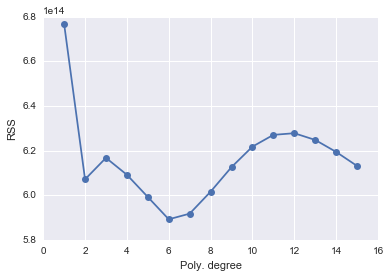

In [40]:
plt.plot(range(1, len(RSS_list)+1), RSS_list, "-o")
plt.xlabel("Poly. degree")
plt.ylabel("RSS")

From the figure above, we see that polynomial degree 6 gives us the lowest RSS on the validation data. 
Thus, we will use this model to calculate the RSS on the test data.

### Calculate the RSS on test data

In [50]:
# Create the polynomial feature SFrame
poly6_data = polynomial_sframe(validation['sqft_living'], 6)
# Extract the column names, which are the features
features = poly6_data.column_names()
# Add the output target
poly6_data['price'] = validation['price']

# Fit a linear regression model to the data
linreg_gl = gl.linear_regression.create(poly6_data, target='price',
                                     features=features, validation_set=None,
                                     verbose=False)

# Create a feature df of the testing data
poly_testing = polynomial_sframe(testing['sqft_living'], 6)

# Predict the output using the linear model estimated from the validation data
predicted = linreg_gl.predict(poly_testing)

# Compute the rss
rss = ((testing['price']-predicted)**2).sum()
print rss

1.23600478163e+14


## Using scikit-learn
Now, let us do the the same linear regression process with the 6th degree poly. model. 

### Creating own csv files from the test, validation and training set above
This has to be done such that we use Linear_Regression from scikit-learn. The datasets will be same, something which is not the case with the files given by coursera.

In [51]:
# Export the SFrames to csv files
training.export_csv("./data/training.csv")
validation.export_csv("./data/validation.csv")
testing.export_csv("./data/testing.csv")

# Now, read these files with pandas
training_df = pd.read_csv("./data/training.csv")
validation_df = pd.read_csv("./data/validation.csv")
testing_df = pd.read_csv("./data/testing.csv")

In [52]:
# Just check shapes to verify
print training.shape
print training_df.shape

(9761, 21)
(9761, 21)


## RSS for polynomials 1-15 using scikit-learn 

In [62]:
RSS_list = []
for i in range(1,16):
    # Create the polynomial dataframe of the wanted feature
    poly_data = polynomial_dataframe(training_df, feature='sqft_living', output=None, degree=i)
    # Extract the feature list
    my_features = poly_data.columns.values 
    # add price to the data since it's the target
    poly_data['price'] = training_df['price'] 
    
    # Initiate and fit the linear regression model
    linreg = LinearRegression()
    linreg.fit(poly_data[my_features], poly_data['price'])
    
    # Now use the validation data to calculate the RSS
    validation_data = polynomial_dataframe(validation_df, feature='sqft_living', output=None, degree=i)
    validation_data['price'] = validation_df['price']
    predictions = linreg.predict(validation_data[my_features])
    RSS = np.sum((predictions - validation_data['price'])**2)
    RSS_list.append(RSS)
    print str(RSS)

6.76709732248e+14
6.07090993663e+14
6.16719663505e+14
6.09123915987e+14
6.10923652088e+14
6.10883907208e+14
6.10885843054e+14
6.10836522217e+14
6.11085858457e+14
6.11243384212e+14
6.11339849257e+14
6.11220772379e+14
6.11221485211e+14
6.11287230614e+14
6.11266289118e+14


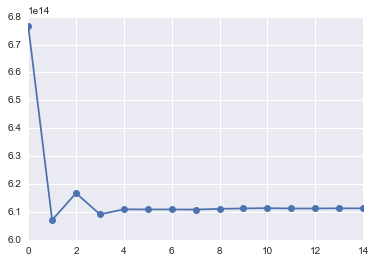

In [63]:
plt.plot(range(1, )RSS_list, "-o")

In [53]:
# Create the feature poly. dataframe
poly6df = polynomial_dataframe(validation_df, feature='sqft_living', output='price', degree=6)
poly6df.head()

,power_1,power_2,power_3,power_4,power_5,power_6,price
0,290,84100,24389000,7072810000,2051114900000,594823321000000,142000.0
1,370,136900,50653000,18741610000,6934395700000,2565726409000000,276000.0
2,380,144400,54872000,20851360000,7923516800000,3010936384000000,245000.0
3,390,152100,59319000,23134410000,9022419900000,3518743761000000,228000.0
4,410,168100,68921000,28257610000,11585620100000,4750104241000000,325000.0


In [54]:
# Create a list of the feature names
features = [colname for colname in poly6df.columns.values if colname.startswith("pow")]
# Set the output variable
output = 'price'
# Initiate the linear regression model
linreg = LinearRegression()
# Fit the model
linreg.fit(poly6df[features], poly6df[output])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
# Now, use the test data to calculate the RSS
poly6df_test = polynomial_dataframe(testing_df, feature='sqft_living', output='price', degree=6)

# Compute the rss
rss = np.sum((testing_df['price'] - linreg.predict(poly6df_test[features]))**2)
print rss

1.27018255892e+14


# Let's look at the difference between scikit-learn and graphlab
## Coefficients

In [56]:
# Scikit-learn
print linreg.intercept_
print linreg.coef_

262872.696028
[  2.40919454e-05   5.66128705e-02  -1.42442772e-06   9.49358288e-11
  -4.34510748e-15  -1.18007744e-16]


In [57]:
# Graphlab
print linreg_gl.coefficients

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -80563.9170061   |   66683.7428273   |
|   power_1   |  None |   829.971831392    |   137.918839396   |
|   power_2   |  None |  -0.646436626646   |   0.104431155246  |
|   power_3   |  None | 0.000268482040869  | 3.70336796201e-05 |
|   power_4   |  None | -5.00295525441e-08 | 6.51467239502e-09 |
|   power_5   |  None | 4.32244002802e-12  | 5.42961963304e-13 |
|   power_6   |  None |  -1.376579098e-16  | 1.69610395256e-17 |
+-------------+-------+--------------------+-------------------+
[7 rows x 4 columns]

